<a href="https://colab.research.google.com/github/hackerman084/Data/blob/master/FinalDataAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import collections
import datetime
import matplotlib as plt

data = pd.read_csv("master_file_no_nan.csv")[2:]

In [0]:
#Useful arrays
R1_R2 = [1, 25, 13,37]
R1_NR1= [2, 26, 14, 38]
R1_NR2= [3, 27, 15, 39]

NR1_R1 = [7, 31, 19, 43]
NR1_R2 = [8, 32, 20,44 ]
NR1_NR2= [9,33, 21,45]

NR2_R1 = [10,34, 22,46]
NR2_R2 = [11, 35, 23, 47]
NR2_NR1 = [12, 36, 24, 48]

R2_R1 = [4, 28, 16, 40]
R2_NR1= [5,29, 17,41]
R2_NR2=[6, 30, 18,42] 

#number of times each treatment condition is seen 
condition_frequency = {"R1_R2":0, "R1_NR1":0, "R1_NR2":0,"NR1_R1":0, "NR1_R2":0, \
                       "NR1_NR2":0, "NR2_R1":0, "NR2_R2":0, "NR2_NR1":0, "R2_R1":0, \
                       "R2_NR1":0, "R2_NR2":0}


condition_arr = {"R1_R2":R1_R2, "R1_NR1":R1_NR1, "R1_NR2":R1_NR2,"NR1_R1":NR1_R1,\
                  "NR1_R2":NR1_R2, "NR1_NR2":NR1_NR2, "NR2_R1":NR2_R1, "NR2_R2":NR2_R2, \
                  "NR2_NR1":NR2_NR1, "R2_R1":R2_R1,"R2_NR1":R2_NR1, "R2_NR2":R2_NR2}

combos = ["R1_R2","R1_NR1","R1_NR2","R2_R1","R2_NR1","R2_NR2","NR1_R1","NR1_R2","NR1_NR2","NR2_R1","NR2_R2", "NR2_NR1"]

both_relevant = [1, 25, 13, 37, 4, 28, 16, 40]
both_irrelevant	= [12, 36, 24, 48, 9, 33, 21, 45]
ai_relevant	= [7,21,8,32,19,34,11,35, 14, 38, 15, 39, 17, 41, 18, 42, 31, 10]		
human_relevant	= [2, 26, 3, 27, 5, 29, 6, 30, 19, 43, 20, 44, 22, 46, 23, 47]		

human_ai = [i for i in range(1,13) ]
human_ai = human_ai + [i for i in range(25,37)]

ai_human = [i for i in range(13, 25)] + [i for i in range(37,49)]
relevance_map = dict()
#maps groupNum to relevance
for x in both_relevant:
    relevance_map[x] = "both_relevant"
for x in both_irrelevant:
    relevance_map[x] = "both_irrelevant"
for x in ai_relevant:
    relevance_map[x] = "ai_relevant"
for x in human_relevant:
    relevance_map[x] = "human_relevant"

#renaming main genre to genre for ease of counting features
# same for Year -> release date
# fb likes 
R1_features = ["budget", "worldwide gross", "facebook likes received by movie", \
               "domestic gross", "vote average", "genre", "profit", \
               "facebook likes received by cast", "country", "runtime", \
               "facebook likes received by lead actor"]
R2_features = ["profit", "content rating", "budget", "genre", \
               "worldwide gross", "vote average", "facebook likes received by cast", \
               "runtime", "facebook likes received by lead actor", "facebook likes received by movie", \
               "country"]
NR1_features = ["profit", "facebook likes received by cast", "domestic gross", "release date", \
                "country", "vote average", "vote count", "runtime", "genre", \
                "facebook likes received by movie", "worldwide gross"]
NR2_features = ["runtime", "vote count", "profit", "worldwide gross", \
                "facebook likes received by cast", "genre", "vote average", \
                "facebook likes received by lead actor", "facebook likes received by movie", \
                "domestic gross", "release date"]
features_map = {"R1": R1_features, "R2":R2_features, "NR1":NR1_features, "NR2": NR2_features}

r1_human_blue = [1,2,3, 40, 43, 46]
r1_human_orange = [25,26,27, 16,19,22]
r1_human = [1,2,3, 40, 43, 46, 25,26,27, 16,19,22 ]

r1_ai_blue = [13,14,15, 28, 31, 34]
r1_ai_orange = [ 4,7,10, 37,38,39]
r1_ai = [13,14,15, 28, 31, 34, 4,7,10, 37,38,39]

r2_human_blue = [4,5,6,37,44,47 ]
r2_human_orange = [28,29,30,13,20,23]
r2_human =  [4,5,6,28,29,30, 37,44,47,13,20,23]

r2_ai_blue = [25,32,35, 16,17,18]
r2_ai_orange = [1,8,11, 40,41,42]
r2_ai = [25,32,35, 16,17,18, 1,8,11, 40,41,42]

nr1_human_blue = [7,8,9, 38,41,48]
nr1_human_orange = [31,32,33, 14,17,24]
nr1_human = [7,8,9, 38,41,48,31,32,33, 14,17,24]

nr1_ai_blue = [26,29,36, 19,20,21]
nr1_ai_orange = [2,5,12 , 43,44,45]
nr1_ai = [26,29,36, 19,20,21, 2,5,12 , 43,44,45 ]

nr2_human_blue = [10,11,12, 39,42,45 ]
nr2_human_orange = [34,35,36, 15,18,21]
nr2_human = [10,11,12, 39,42,45 , 34,35,36, 15,18,21]

nr2_ai_blue = [27,30,33, 22,23,24]
nr2_ai_orange = [3,6,9, 46,47,4]
nr2_ai = [27,30,33, 22,23,24, 3,6,9, 46,47,48]
possible_likert = ["Strongly disagree", "Disagree", "Neutral", "Agree", "Strongly agree"]

In [0]:
#Adding relevance column 
data["relevance"] = [relevance_map[int(x)] for x in data["groupNum"]]

# add the names of the grids they saw as a column
display = dict()
# combos = ["R1_R2","R1_NR1","R1_NR2","R2_R1","R2_NR1","R2_NR2","NR1_R1","NR1_R2","NR1_NR2","NR2_R1","NR2_R2", "NR2_NR1"]

for x in range(1,13):
  display[x] = combos[x-1]

for x in range(13, 25):
  display[x] = combos[x-13]

for x in range(25, 37):
  display[x] = combos[x-25]

for x in range(37, 49):
  display[x] = combos[x-37]

data["displayed_grid"] = [display[int(i)] for i in data["groupNum"]]

#Adding chosen grid code column
chosen_grid_code = []
chosen_color = []
order = []

for index, row in data.iterrows():
    groupNum = int(row["groupNum"])
    if groupNum in human_ai:
        order.append("Human_AI")
    else:
        order.append("AI_Human")
    if groupNum in r1_human and "Human" in row["Q49"]:
        chosen_grid_code.append("R1")
        if groupNum in r1_human_blue:
            chosen_color.append("blue")
        else:
            chosen_color.append("orange")
    elif groupNum in r1_ai and "Algo" in row["Q49"]:
        chosen_grid_code.append("R1")
        if groupNum in r1_ai_blue:
            chosen_color.append("blue")
        else:
            chosen_color.append("orange")
    elif groupNum in r2_human and "Human" in row["Q49"]:
        chosen_grid_code.append("R2")
        if groupNum in r2_human_blue:
            chosen_color.append("blue")
        else:
            chosen_color.append("orange")
    elif groupNum in r2_ai and "Algo" in row["Q49"]:
        chosen_grid_code.append("R2")
        if groupNum in r1_ai_blue:
            chosen_color.append("blue")
        else:
            chosen_color.append("orange")
    elif groupNum in nr1_human and "Human" in row["Q49"]:
        chosen_grid_code.append("NR1")
        if groupNum in nr1_human_blue:
            chosen_color.append("blue")
        else:
            chosen_color.append("orange")
    elif groupNum in nr1_ai and "Algo" in row["Q49"]:
        chosen_grid_code.append("NR1")    
        if groupNum in nr1_ai_blue:
            chosen_color.append("blue")
        else:
            chosen_color.append("orange")   
    elif groupNum in nr2_human and "Human" in row["Q49"]:
        chosen_grid_code.append("NR2")
        if groupNum in nr2_human_blue:
            chosen_color.append("blue")
        else:
            chosen_color.append("orange")
    elif groupNum in nr2_ai and "Algo" in row["Q49"]:
        chosen_grid_code.append("NR2")
        if groupNum in nr1_ai_blue:
            chosen_color.append("blue")
        else:
            chosen_color.append("orange")


data["chosen_grid_code"] = chosen_grid_code
data["chosen_color"] = chosen_color
data["order"] = order

left_grid= []
right_grid = []
for index, row in data.iterrows():
    grid_arr = row["displayed_grid"].split("_")
    left_grid.append(grid_arr[0])
    right_grid.append(grid_arr[1])

data["left_panel"] = left_grid
data["right_panel"] = right_grid

data.to_csv("master_file_with_analysis.csv")

In [0]:
def ci_single_prop(sample_prop, z_score, n):
    delta = z_score * sqrt(sample_prop*(1-sample_prop) / n)
    return (sample_prop - delta, sample_prop + delta)

#always done in terms of the proportion 1
def ci_two_prop(sample_prop_1, sample_prop_2, z_score, n1, n2):
    delta = z_score * sqrt((sample_prop_1*(1-sample_prop_1) / n1) + \
                           (sample_prop_2*(1-sample_prop_2) / n2))
    diff_in_sample = (sample_prop_1 - sample_prop_2)

    return (diff_in_sample - delta, diff_in_sample + delta)


# **Finding: Relevance Analysis** 
---


If both panels were equally relevant or equally irrelevant, there appears to be a bias towards choosing the AI-generated panels (57% AI vs 42% for both_irrelevant and 55% AI vs 44% for both_relevant). <br>

However, when there is a clear bias towards either AI or the humans, there is still more of a likelihood of people choosing a human panel / it's not as strong of a preference towards AI (50/50 for ai_relevant, and 58% human 42% AI for human_relevant)

In [0]:
counts_of_both = data.groupby(["relevance", "Q49"]).count()
counts_of_relevance = data.groupby(["relevance"]).count()
percentages_of_both = 100*counts_of_both / counts_of_relevance
counts_of_relevance
# ci_two_prop()
percentages_of_both

DistributionChannel  ...   groupNum
relevance       Q49                                             ...           
ai_relevant     Algorithmically-generated            50.000000  ...  50.000000
                Human-curated                        50.000000  ...  50.000000
both_irrelevant Algorithmically-generated            57.142857  ...  57.142857
                Human-curated                        42.857143  ...  42.857143
both_relevant   Algorithmically-generated            55.555556  ...  55.555556
                Human-curated                        44.444444  ...  44.444444
human_relevant  Algorithmically-generated            41.666667  ...  41.666667
                Human-curated                        58.333333  ...  58.333333

[8 rows x 89 columns]

# **Finding: Relevance Analysis** 
---
Of course, people seemed to rate their choices higher, even given their priors. However, if we assume our relevance metrics to be correct, then we can see some big rating bumps in correspondence with people's choices, indicating that perhaps people are making allowances for their choices?
 <br>


In [0]:
data["AI_rating"] = [float(x) for x in data["Q95_1"]] #AI rating
data["Human_rating"] = [float(x) for x in data["Q95_2"]] # Human Rating

#median chosen to be more robust metric because we kinda use the numbers categorically
data.groupby([ "Q27", "Q49"]).median()

data.groupby([ "relevance", "Q49"]).median()

Unnamed: 0  ...  Human_rating
relevance       Q49                                    ...              
ai_relevant     Algorithmically-generated        47.0  ...           7.0
                Human-curated                    60.0  ...           7.0
both_irrelevant Algorithmically-generated        56.5  ...           5.0
                Human-curated                    36.0  ...           8.0
both_relevant   Algorithmically-generated        73.5  ...           7.0
                Human-curated                    63.0  ...           7.0
human_relevant  Algorithmically-generated        68.0  ...           6.0
                Human-curated                    64.0  ...           7.0

[8 rows x 6 columns]

#Findings: Relevance Metrics
It seems like our relevance metrics may have been off. Looking at the medians, there is no real discernable difference between, say, NR1 - Algo (7) and R2 - Algo (7). Similarly for humans, where NR1 - Human (8) was in fact higher than R1 - Human (7). Specifically looking at the AI_rating columns and Human_rating column, which corresponds to the quality of visualization sliders 

In [0]:
data.groupby(["chosen_grid_code", "Q49"]).median()

Unnamed: 0  ...  Human_rating
chosen_grid_code Q49                                    ...              
NR1              Algorithmically-generated        64.5  ...           5.0
                 Human-curated                    60.0  ...           8.0
NR2              Algorithmically-generated        55.5  ...           5.5
                 Human-curated                    45.0  ...           7.0
R1               Algorithmically-generated        46.0  ...           6.0
                 Human-curated                    48.0  ...           7.0
R2               Algorithmically-generated        70.0  ...           7.0
                 Human-curated                    74.5  ...           7.5

[8 rows x 5 columns]

## Examining Likert : Mismatched Relevance
When looking at the question "There was a noticeable difference in the quality of recommendations between humans and algorithms." in the mis-matched relevance groups, there are the percentage of responses. Approximately 42% of people agree, and 7% strongly agree.

In [0]:
# Examining Likert Scores

#seems like they could tell a difference
freq = {}
total_mismatch = 0
for x in possible_likert:
    freq[x] = 0

for index, row in data.iterrows():
    if int(row["groupNum"]) in ai_relevant or int(row["groupNum"]) in human_relevant:
        total_mismatch = total_mismatch + 1
        freq[row["Q13_1"]] = freq[row["Q13_1"]] + 1

for key,value in freq.items():
    freq[key] = 100 * float(value/total_mismatch)

freq

{'Agree': 41.891891891891895,
 'Disagree': 16.216216216216218,
 'Neutral': 35.13513513513514,
 'Strongly agree': 6.756756756756757,
 'Strongly disagree': 0.0}

However, in the matched grouping for the same question, 47.5% of people agreed that there was a difference in quality, and 5% strongly agreed.

In [0]:
freq = {}
total_match = 0
for x in possible_likert:
    freq[x] = 0
for index, row in data.iterrows():
    if int(row["groupNum"]) in both_irrelevant or int(row["groupNum"]) in both_relevant:
        total_match = total_match + 1
        freq[row["Q13_1"]] = freq[row["Q13_1"]] + 1

for key,value in freq.items():
    freq[key] = 100* float(value/total_match)

freq

{'Agree': 47.5,
 'Disagree': 17.5,
 'Neutral': 27.500000000000004,
 'Strongly agree': 5.0,
 'Strongly disagree': 2.5}

For some reason, people on the whole found both sets of visualizations to be pretty helpful, with 55% of people agreeing with the statement that "Both sets of visualizations from humans and algorithms were useful" and 10% strongly agreeing.

In [0]:
freq = {}
total_match = 0
for x in possible_likert:
    freq[x] = 0
for index, row in data.iterrows():
    if int(row["groupNum"]) in both_irrelevant or int(row["groupNum"]) in both_relevant:
        total_match = total_match + 1
        freq[row["Q13_3"]] = freq[row["Q13_3"]] + 1

for key,value in freq.items():
    freq[key] = 100* float(value/total_match)

freq

{'Agree': 55.00000000000001,
 'Disagree': 10.0,
 'Neutral': 22.5,
 'Strongly agree': 10.0,
 'Strongly disagree': 2.5}

It does generally seem, though, that people tended to choose grids that had more features in common with the ones they chose, which indicates a certain level of logical thinking. The median indicates that most people look for 3 features / 5, with some categories going so far as 4 features in common

In [0]:
num_common_features = []

for index, row in data.iterrows():
    top_5_features = row["Q4_0_GROUP"].split(",")
    top_5_features = [x.lower() for x in top_5_features]
    count = 0
    # print(top_5_features)
    # print(features_map[row["chosen_grid_code"]])
    for feature in top_5_features:
        for val in features_map[row["chosen_grid_code"]]:
            if val in feature:
                # print(val)
                count = count + 1

    num_common_features.append(count)
    # print("=======")

data["number_feature_overlap"] = num_common_features
data.groupby(["chosen_grid_code"]).median()




,Unnamed: 0,ef_nr2_r1,ef_nr2_r2,AI_rating,Human_rating,number_feature_overlap
chosen_grid_code,,,,,,
NR1,61.0,22.0,35.0,6.0,7.0,3.0
NR2,52.0,34.0,47.0,6.0,6.0,3.0
R1,46.5,10.0,35.0,6.5,7.0,3.0
R2,70.0,34.0,23.0,6.0,7.0,4.0


It does seem, though, that people were more satisfied in their choices when choosing the algorithmic one than with the human curated one, with 51% of people agreeing to being satisfied with their choice and 5% strongly agreeing. However, less people that chose human-curated were dis-satisfied with their results, with only 12% disagreeing with their choice in satisfaction.

In [0]:
100 * data.groupby(["Q49", "Q13_8" ]).count() / data.groupby(["Q49"]).count()

AI_rating  ...  relevance
Q49                       Q13_8                         ...           
Algorithmically-generated Agree              51.785714  ...  51.785714
                          Disagree           23.214286  ...  23.214286
                          Neutral            17.857143  ...  17.857143
                          Strongly agree      5.357143  ...   5.357143
                          Strongly disagree   1.785714  ...   1.785714
Human-curated             Agree              45.614035  ...  45.614035
                          Disagree           12.280702  ...  12.280702
                          Neutral            33.333333  ...  33.333333
                          Strongly agree      7.017544  ...   7.017544
                          Strongly disagree   1.754386  ...   1.754386

[10 rows x 90 columns]

## Findings: Relevance Metrics
It seems that our panels were mostly in line with what people chose are their top 5. 

Our Top 5 was: 
1.   Budget
2.   Popularity
3.   Content Rating
4.   Main Genre
5.   Profit

And Prolific found it to be: 
1.  Budget
2.  Popularity
3.  Genre
4.  Profit
5.  Worldwide Gross



In [0]:
#See what features people commonly chose
top_5_features = list(data["Q4_0_GROUP"])
top_5_features = [x.split(",") for x in top_5_features]
top_5_features = [item for sublist in top_5_features[2:] for item in sublist]

feature_freq = dict()
for item in top_5_features:
    if item not in feature_freq.keys():
        feature_freq[item] = 1
    else:
        feature_freq[item] = feature_freq[item] + 1

feature_freq = sorted(feature_freq.items(), key=lambda kv: kv[1], reverse=True)
feature_freq[0:5]

[('Budget (in Dollars)', 80),
 ('Popularity (Popularity Score of Film)', 76),
 ('Genre (Primary Genre of Film)', 74),
 ('Profit (in Dollars)', 58),
 ('Worldwide Gross (Revenue in International Box Office)', 51)]

#Finding: Duration / Standard Deviation
On average, it took participants 17.34 minutes to do the survey, with a standard deviation of 9.48 minutes.

In [0]:
# average duration for survey completion
data["Duration (in seconds)"] = [float(x) for x in data["Duration (in seconds)"]]
seconds = list(data["Duration (in seconds)"])
total_seconds = sum(seconds)
total_mins = datetime.timedelta(seconds=total_seconds)
average_time = total_mins / len(seconds)
print(average_time)

print(np.mean(seconds)/60)
np.std(seconds) / 60

0:17:20.566372
17.34277286135693


9.476156456098808

#Findings: Priors and Their Impact

We find that 59% of people chose human recommendations, 15% chose AI, and 26% had no preference.

https://imgur.com/T4Y2L9v (we can't embed images for some reason)

In [0]:
# distribution of answers to the priming question (Q27)
priming_count = dict()
for item in data["Q27"]:
    if item not in priming_count.keys():
        priming_count[item] = 1
    else:
        priming_count[item] = priming_count[item] + 1

priming_count
priming_percent = {}
for key, value in priming_count.items():
    priming_percent[key] = 100 * value/len(data["Q27"])

priming_percent

{'Algorithmic recommendations': 15.044247787610619,
 'Human recommendations': 59.29203539823009,
 'No preference': 25.663716814159294}

However, despite this, their preference is somehwat predictive of their choices. 58% of people with an AI bias chose an AI generated panel, and similar numbers for human bias with humanr recommendations. However, in the no preference category, more people were likely to choose an AI generated panel (62%)

In [0]:
100 * data.groupby(["Q27", "Q49"]).count() / data.groupby(["Q27"]).count()

DistributionChannel  ...  relevance
Q27                         Q49                                             ...           
Algorithmic recommendations Algorithmically-generated            58.823529  ...  58.823529
                            Human-curated                        41.176471  ...  41.176471
Human recommendations       Algorithmically-generated            41.791045  ...  41.791045
                            Human-curated                        58.208955  ...  58.208955
No preference               Algorithmically-generated            62.068966  ...  62.068966
                            Human-curated                        37.931034  ...  37.931034

[6 rows x 89 columns]

In [0]:
# adherence to the initial priming answer 
# e.g. for participants who answered H in the priming question, what percentage of them selected the human grid later on?
def priming_impact(initial_ans):
    priming_data = data.loc[data.Q27 == initial_ans]
    h_count = a_count = 0
    for item in priming_data["Q49"]:
        if item == "Human-curated":
            h_count = h_count + 1
        else:
            a_count = a_count + 1
    total = priming_count[initial_ans]
    h_avg = float(h_count)/float(total) * 100
    a_avg = float(a_count)/float(total) * 100
    return (h_avg, a_avg)
  
h_adherence = priming_impact('Human recommendations')
a_adherence = priming_impact('Algorithmic recommendations')
np_adherence = priming_impact('No preference')

# interpretation: on the whole, people's grid selection closely aligned with their answer to the priming question
print(h_adherence)
print(a_adherence)
print(np_adherence)

(58.2089552238806, 41.7910447761194)
(41.17647058823529, 58.82352941176471)
(37.93103448275862, 62.06896551724138)


Breaking it down further by relevance probably won't be helpful because of how few numbers are present within each sub-category

In [0]:
data.groupby(["Q27", "relevance", "Q49"]).count() #/ data.groupby(["Q27", "relevance"]).count()

Unnamed: 0  ...  chosen_color
Q27                         relevance       Q49                                    ...              
Algorithmic recommendations ai_relevant     Algorithmically-generated           4  ...             4
                            both_irrelevant Algorithmically-generated           2  ...             2
                            both_relevant   Algorithmically-generated           2  ...             2
                                            Human-curated                       3  ...             3
                            human_relevant  Algorithmically-generated           2  ...             2
                                            Human-curated                       4  ...             4
Human recommendations       ai_relevant     Algorithmically-generated          10  ...            10
                                            Human-curated                      15  ...            15
                            both_irrelevant Algorithmically-generated           7  ...             7
                                            Human-curated                       7  ...             7
                            both_relevant   Algorithmically-generated           6  ...             6
                                            Human-curated                       2  ...             2
                            human_relevant  Algorithmically-generated           5  ...             5
                                            Human-curated                      15  ...            15
No preference               ai_relevant     Algorithmically-generated           5  ...             5
                                            Human-curated                       4  ...             4
                            both_irrelevant Algorithmically-generated           3  ...             3
                                            Human-curated                       2  ...             2
                            both_relevant   Algorithmically-generated           2  ...             2
                                            Human-curated                       3  ...             3
                            human_relevant  Algorithmically-generated           8  ...             8
                                            Human-curated                       2  ...             2

[22 rows x 87 columns]

#Findings: Impact of Experience

We see that across the board, people seem to choose AI more except those who noted that they perform data analysis tasks weekly. This follows a similar pattern with data visualizations, where the more frequently people use it, the less likely they are to choose AI panels.

In [0]:
# Q21: how often do you perform data analysis tasks?
100 * data.groupby(["Q21", "Q49", ]).count() / data.groupby(["Q21"]).count()

Unnamed: 0  ...  chosen_color
Q21                    Q49                                    ...              
Almost never           Algorithmically-generated          18  ...            18
                       Human-curated                      15  ...            15
Daily                  Algorithmically-generated           2  ...             2
                       Human-curated                       1  ...             1
Less than once a month Algorithmically-generated          19  ...            19
                       Human-curated                      17  ...            17
Less than once a week  Algorithmically-generated          10  ...            10
                       Human-curated                      10  ...            10
Weekly                 Algorithmically-generated           7  ...             7
                       Human-curated                      14  ...            14

[10 rows x 88 columns]

In [0]:
# Q137: how often do you create data visualizations?
100 * data.groupby([ "Q137", "Q49",]).count() / data.groupby(["Q137"]).count()

DistributionChannel  ...   relevance
Q137                   Q49                                             ...            
Almost Never           Algorithmically-generated            54.000000  ...   54.000000
                       Human-curated                        46.000000  ...   46.000000
Daily                  Algorithmically-generated           100.000000  ...  100.000000
Less than once a month Algorithmically-generated            43.902439  ...   43.902439
                       Human-curated                        56.097561  ...   56.097561
Less than once a week  Algorithmically-generated            50.000000  ...   50.000000
                       Human-curated                        50.000000  ...   50.000000
Weekly                 Algorithmically-generated            44.444444  ...   44.444444
                       Human-curated                        55.555556  ...   55.555556

[9 rows x 89 columns]

#Finding: Impact of Color
It seems like people were more likely to choose certain grids based on the color, with overall more people choosing grids when they are orange than when they are blue.

In [0]:
100 * data.groupby(["chosen_grid_code", "chosen_color", ]).count() / data.groupby(["chosen_grid_code" ]).count()

DistributionChannel  ...  relevance
chosen_grid_code chosen_color                       ...           
NR1              blue                    48.387097  ...  48.387097
                 orange                  51.612903  ...  51.612903
NR2              blue                    24.000000  ...  24.000000
                 orange                  76.000000  ...  76.000000
R1               blue                    42.307692  ...  42.307692
                 orange                  57.692308  ...  57.692308
R2               blue                    32.258065  ...  32.258065
                 orange                  67.741935  ...  67.741935

[8 rows x 89 columns]

Though it does seem like people are more likely to choose human-curated if the panel was blue than orange, as opposed to when they chose algorithmically generated

In [0]:
100 * data.groupby(["Q49",  "chosen_color", ]).count() / data.groupby(["Q49" ]).count()

DistributionChannel  ...  relevance
Q49                       chosen_color                       ...           
Algorithmically-generated blue                    21.428571  ...  21.428571
                          orange                  78.571429  ...  78.571429
Human-curated             blue                    52.631579  ...  52.631579
                          orange                  47.368421  ...  47.368421

[4 rows x 89 columns]

It doesn't seem like people are up-rating certain grids because of their color though.

In [0]:
data.groupby(["chosen_color", "chosen_grid_code"]).median()

Unnamed: 0  ...  Human_rating
chosen_color chosen_grid_code              ...              
blue         NR1                     50.0  ...           6.0
             NR2                     29.0  ...           7.5
             R1                      48.0  ...           7.0
             R2                      65.0  ...           7.0
orange       NR1                     63.5  ...           7.0
             NR2                     59.0  ...           6.0
             R1                      44.0  ...           7.0
             R2                      71.0  ...           7.0

[8 rows x 6 columns]

#Finding: Qualitative Analysis

We first did a single pass where we ended up with 32 codes which we condensed into 10 overall themes: 

*   Personal Experiences
*   Visual aesthetics
*   Reliability
*   Trust in source
*   Indifference
*   Overall Comprehension
*   Data Analysis Process (information applicability and analysis interests)
*   Direct Comparison of Grids
*   Bias against other recommender
*   Desire for insight on recommender's decision-making process




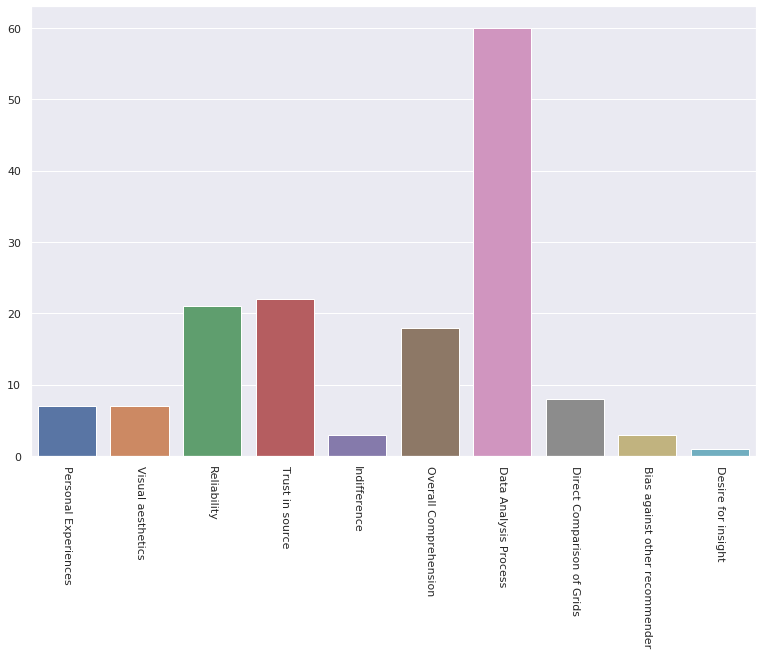

In [0]:
x_arr = ["Personal Experiences", "Visual aesthetics", "Reliability", \
         "Trust in source", "Indifference", "Overall Comprehension", \
         "Data Analysis Process", "Direct Comparison of Grids", \
         "Bias against other recommender", \
         "Desire for insight"]
y_arr = [7,	7,	21,	22,	3,	18,	60,	8,	3,	1]
sns.set(rc={'figure.figsize':(13,8.27)})
bar = sns.barplot(x_arr, y_arr)
for item in bar.get_xticklabels():
    item.set_rotation(270)

#Finding: Impact of Order
It doesn't seem like ordering had a large impact on subsequent choice. The grid below shows the difference in percentage of people who chose a specific panel when it was displayed on the left versus on the right. So for instance, 3% more of people chose NR1 on the left than on the right. Similarly, 13% more chose NR2 when it was on the left versus on the right. These numbers indicate that ordering did not seem to have a large impact on subsequent choice.

In [26]:
100*data.groupby(["left_panel","chosen_grid_code"]).count()/data.groupby(["left_panel"]).count() - 100*data.groupby(["right_panel","chosen_grid_code"]).count()/data.groupby(["right_panel"]).count()


DistributionChannel  ...  right_panel
left_panel chosen_grid_code                       ...             
NR1        NR1                          2.986858  ...          NaN
           NR2                          5.017921  ...          NaN
           R1                          -1.911589  ...          NaN
           R2                          -6.093190  ...          NaN
NR2        NR1                          2.142857  ...          NaN
           NR2                         12.857143  ...          NaN
           R1                         -13.214286  ...          NaN
           R2                          -1.785714  ...          NaN
R1         NR1                         -4.040404  ...          NaN
           NR2                         -3.367003  ...          NaN
           R1                          -2.020202  ...          NaN
           R2                           9.427609  ...          NaN
R2         NR1                         -4.500000  ...          NaN
           NR2                         -4.666667  ...          NaN
           R1                          15.833333  ...          NaN
           R2                          -6.666667  ...          NaN

[16 rows x 93 columns]